#Set record number#

In [0]:
k = 100000

#Create noise array#

In [2]:
import numpy as np
np.set_printoptions(suppress=True)
noise = np.random.normal(0,1,k)
noise

array([-0.73428545, -0.06832739,  1.00987566, ..., -0.74211234,
       -0.22864451, -0.17470236])

In [3]:
noise.size

100000

#Create first variable (source1) through autoregression:# 
S1(n)=0.125*√2*exp(-S1(n-1)*S1(n-1)/2) + ε1

In [0]:
source1 = np.zeros((k))
import math
source1[1] = noise[1] + 10
source1[2] = noise[2] + 10
for x in range(3,k):
  source1[x] = 0.125*math.sqrt(2)*math.exp(-source1[x-1]*source1[x-1]/2) + noise[x]


source1
np.savetxt("source1-nonlinear.csv", source1, delimiter=",")
#def oneTimeSeries(x0, x1, noise, 100):
#  noise[] = 0.95*x0 - 0.92*x0

from google.colab import files
files.download( "source1-nonlinear.csv" ) 


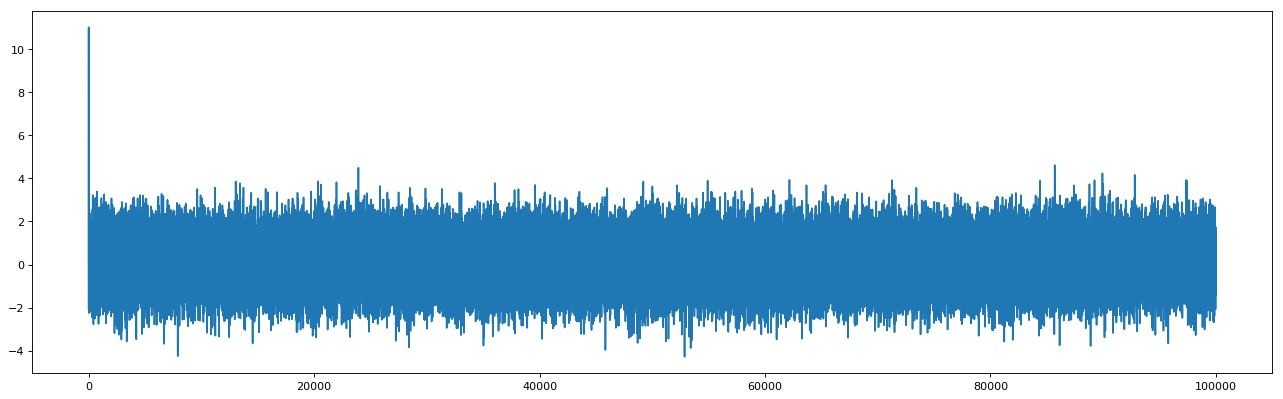

In [5]:
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt
# plot the line
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))
plt.plot(source1)

#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.set_size_inches(11,8)
#plot.show()
plt.show()

#Create variable source2 through autoregression#

S2(n)=1.2*exp(-S1(n-1)*S1(n-1)/2) + ε2

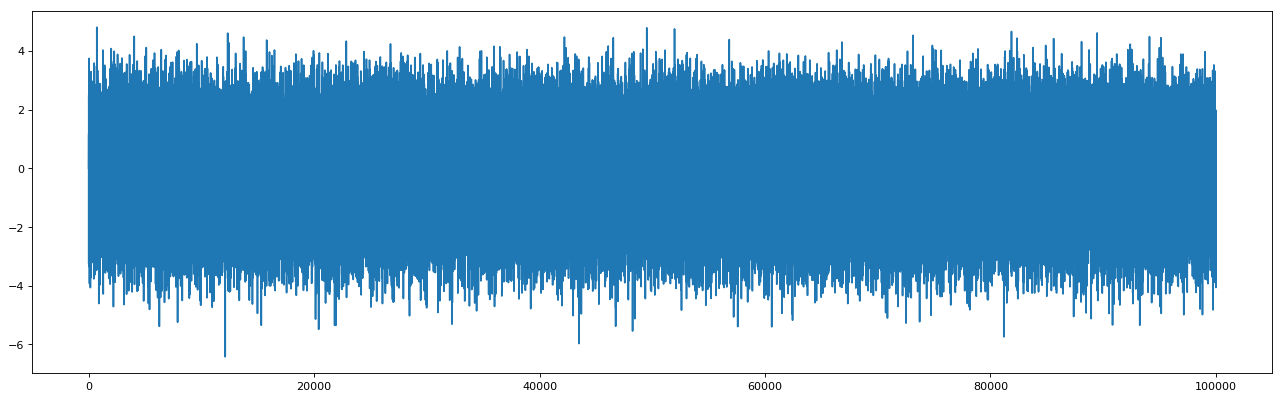

In [6]:
source2 = np.zeros((k))
np.set_printoptions(suppress=True)
noise2 = np.random.normal(0,1,k)
noise2
import math
source2[1] = noise2[1]
source2[2] = noise2[2]
for x in range(3,k):
  if source1[x-1] > 0:
     source2[x] = 1.2*math.exp(-source1[x-1]*source1[x-1]/2) + noise2[x]
  else:
     source2[x] = -2*math.exp(-source1[x-1]*source1[x-1]) + noise2[x]

source2
np.savetxt("source2-nonlinear.csv", source2, delimiter=",")
#def oneTimeSeries(x0, x1, noise, 100):
#  noise[] = 0.95*x0 - 0.92*x0

from google.colab import files
files.download( "source2-nonlinear.csv" )

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))
plt.plot(source2)

#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.set_size_inches(11,8)
#plot.show()
plt.show()

#Create variable source3 based on autoregression source1 and source2#
S3(n)= -1.05*exp(-S1(n-1)*S1(n-1)/2) + ε3

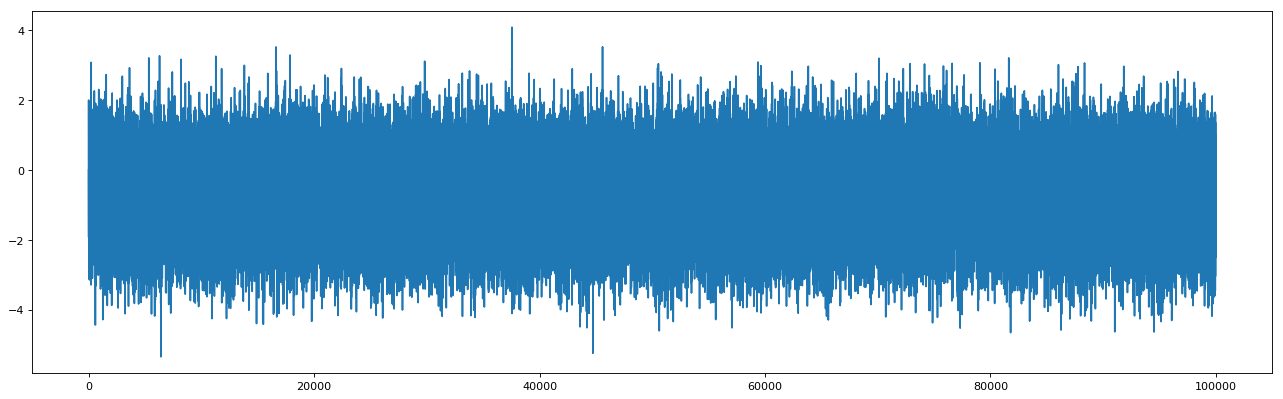

In [0]:
source3 = np.zeros((k))
np.set_printoptions(suppress=True)
noise3 = np.random.normal(0,1,k)
noise3
import math
source3[1] = noise3[1]
source3[2] = noise3[2]
for x in range(3,k):
  source3[x] = -1.05*math.exp(-source1[x-1]*source1[x-1]/2) + noise3[x]


source2
np.savetxt("source3-nonlinear.csv", source3, delimiter=",")
#def oneTimeSeries(x0, x1, noise, 100):
#  noise[] = 0.95*x0 - 0.92*x0

from google.colab import files
files.download( "source3-nonlinear.csv" )

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))
plt.plot(source3)

#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.set_size_inches(11,8)
#plot.show()
plt.show()

#Create variable source4 based on autoregression, and source3#

S4(n)= -1.15*exp(-S1(n-1)*S1(n-1)/2) + 0.2 * √2  * exp(-S4(n-1)*S4(n-1)/2) + 1.35  * exp(-S3(n-1)*S3(n-1)/2) + ε4

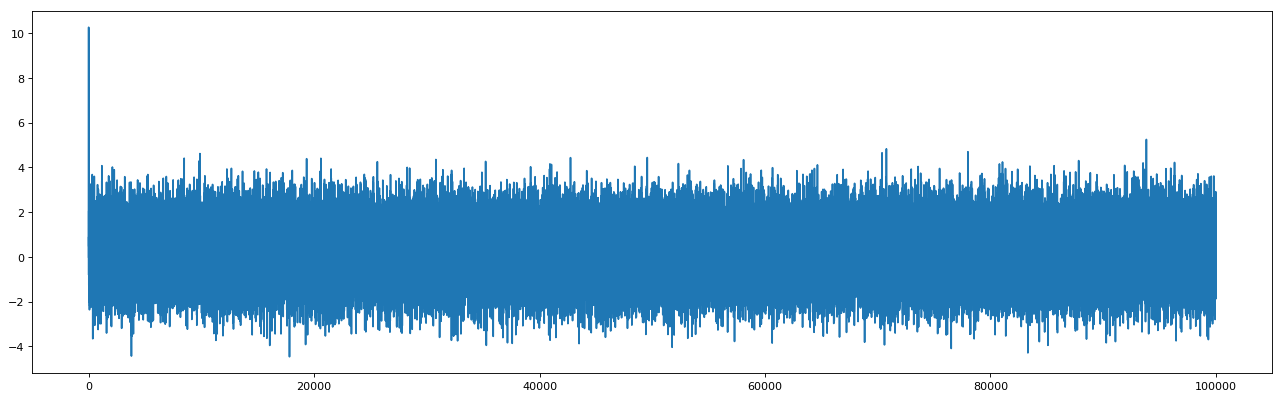

In [0]:
source4 = np.zeros((k))
np.set_printoptions(suppress=True)
noise4 = np.random.normal(0,1,k)
import math
source4[1] = noise4[1] + 10
source4[2] = noise4[2] + 10
for x in range(3,k):
  source4[x] = -1.15*math.exp(-source1[x-1]*source1[x-1]/2) + 0.2*math.sqrt(2)*math.exp(-source4[x-1]*source4[x-1]/2) + 1.35*math.exp(-source3[x-1]*source3[x-1]/2) + noise4[x]


source4
np.savetxt("source4-nonlinear.csv", source4, delimiter=",")
#def oneTimeSeries(x0, x1, noise, 100):
#  noise[] = 0.95*x0 - 0.92*x0

from google.colab import files
files.download( "source4.csv" ) 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))
plt.plot(source4)

#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.set_size_inches(11,8)
#plot.show()
plt.show()

In [0]:
combined = np.vstack((source1, source2, source3, source4)).T
np.savetxt("combined-nonlinear.csv", combined, delimiter=",", fmt='%f')
from google.colab import files
files.download( "combined-nonlinear.csv" ) 

In [0]:
combined

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [11.68329142,  0.0578047 , -0.77088338,  9.31264331],
       [11.41832508, -0.54706426,  1.9994928 , 10.26513518],
       ...,
       [-0.91955864,  2.04420822, -0.07353219, -0.56976871],
       [-0.60076553,  2.10606249, -0.56772779,  0.56465006],
       [-1.47714892,  0.06797279,  0.62527855,  1.47124835]])